In [1]:
'''
Problem Statements: 1.Divide the diabetes data into train and test datasets and build a Random Forest and Decision Tree model with Outcome as
the output variable. 

1.1.	What is the business objective?
Accurately classify individuals as diabetic or non-diabetic.
Identify the most important predictors of diabetes, such as glucose levels, BMI, or age.
Assist healthcare providers in early diagnosis and preventive measures.

1.2 	Are there any constraints?
Missing or noisy data may affect model accuracy, especially in a healthcare-related dataset.
If the diabetic and non-diabetic classes are not balanced, models may struggle to predict the minority class.
Random Forest models, with their ensemble approach, may require significant processing time and resources for large datasets
'''

'\nProblem Statements: 1.Divide the diabetes data into train and test datasets and build a Random Forest and Decision Tree model with Outcome as\nthe output variable. \n\n1.1.\tWhat is the business objective?\nAccurately classify individuals as diabetic or non-diabetic.\nIdentify the most important predictors of diabetes, such as glucose levels, BMI, or age.\nAssist healthcare providers in early diagnosis and preventive measures.\n\n1.2 \tAre there any constraints?\nMissing or noisy data may affect model accuracy, especially in a healthcare-related dataset.\nIf the diabetic and non-diabetic classes are not balanced, models may struggle to predict the minority class.\nRandom Forest models, with their ensemble approach, may require significant processing time and resources for large datasets\n'

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset
data = pd.read_csv('Diabetes.csv')

In [16]:
# Display the first few rows of the dataset
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [17]:
#EDA
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
  Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic blood pressure        0
 Triceps skin fold thickness     0
 2-Hour serum insulin            0
 Body mass index                 0
 Diabetes pedigree function      0
 Age (years)                     0
 Class variable                  0
dtype: int64


In [18]:
#THERE IS NO NULL VALUE

In [20]:
# Check the column names
print("Column names in the dataset:", data.columns)

Column names in the dataset: Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')


In [24]:
# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()
#AS IT WAS GIVING COLUMN NAME ERROR SO WE DELETED THOISE SPACES

In [25]:
# Split the data into features and target variable
X = data.drop('Class variable', axis=1)
y = data['Class variable']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Build the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# Predict the target variable for the test set
y_pred_dt = dt_model.predict(X_test)

In [29]:
# Evaluate the Decision Tree model
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Model Accuracy: 0.7012987012987013
Classification Report:
               precision    recall  f1-score   support

          NO       0.81      0.71      0.76       151
         YES       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231

Confusion Matrix:
 [[107  44]
 [ 25  55]]


In [30]:
# Build the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Predict the target variable for the test set
y_pred_rf = rf_model.predict(X_test)

In [32]:
# Evaluate the Random Forest model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

          NO       0.82      0.80      0.81       151
         YES       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231

Confusion Matrix:
 [[121  30]
 [ 27  53]]


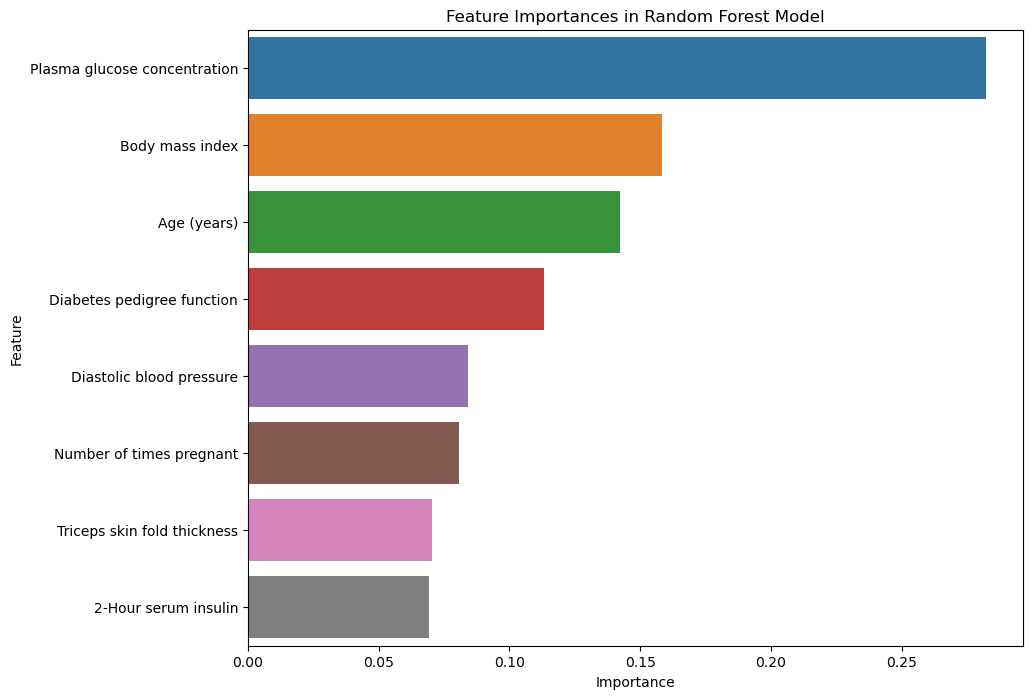

In [33]:
# Plot feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [ ]:
#6.	Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided?
'''
1.Early Detection and Prevention
2.Personalized Treatment Plans
3.Early detection and personalized care can significantly reduce the cost of treatment.
4.Improved Patient Engagement
'''